In [1]:
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
dataset_path = 'datasets'
batch_size=256
train_dataset = datasets.FashionMNIST(dataset_path, transform=ToTensor(), train=True, download=True)
test_dataset  = datasets.FashionMNIST(dataset_path, transform=ToTensor(), train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting datasets\FashionMNIST\raw\train-images-idx3-ubyte.gz to datasets\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting datasets\FashionMNIST\raw\train-labels-idx1-ubyte.gz to datasets\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting datasets\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to datasets\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting datasets\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to datasets\FashionMNIST\raw



In [5]:
print(len(train_dataset),"\n",len(test_dataset))

60000 
 10000


In [6]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [11]:
labels_map = {0: "T-Shirt",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",
              6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle Boot"}
img,label = train_dataset[0]

In [12]:
img.shape

torch.Size([1, 28, 28])

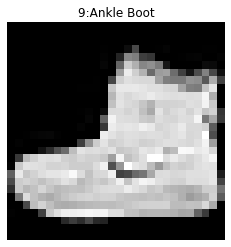

In [13]:
plt.title('{}:{}'.format(label,labels_map[label]))
plt.axis('off')
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [19]:
train_loader = DataLoader(dataset=train_dataset,batch_size=256,shuffle=True)
len(train_loader)

235

In [18]:
train_features, train_labels = next(iter(train_loader))
print(len(train_features))

256


In [21]:
from torch.utils.data import Subset

train_idx = np.where((train_dataset.targets==0))[0]
train_subset = Subset(train_dataset, train_idx)
train_loader_subset = DataLoader(train_subset, shuffle=True, batch_size=batch_size)

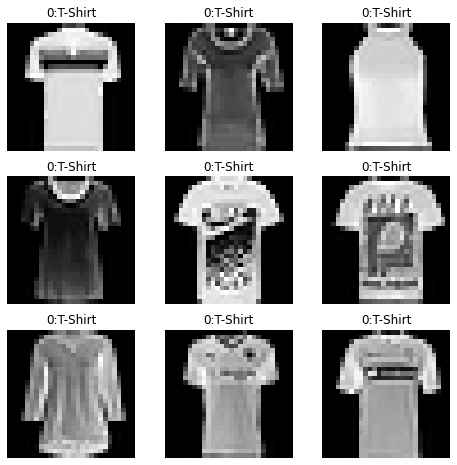

In [22]:

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  
    sample_idx = torch.randint(len(train_subset), size=(1,)).item()
    img, label = train_subset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title('{}:{}'.format(label,labels_map[label]))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
plt.show()

In [23]:
from torch.utils.data import ConcatDataset

dataset = ConcatDataset([train_dataset,test_dataset])
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
len(dataset) #70000
len(data_loader) #274

274